# Import the prepared data and required libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
df_train = pd.read_csv('prepared_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null int64
Q              889 non-null int64
S              889 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.5 KB


# Entscheidungsbaum Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predictions = dtree.predict(X_test)

In [17]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[148  30]
 [ 29  60]]


             precision    recall  f1-score   support

          0       0.84      0.83      0.83       178
          1       0.67      0.67      0.67        89

avg / total       0.78      0.78      0.78       267



In [18]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

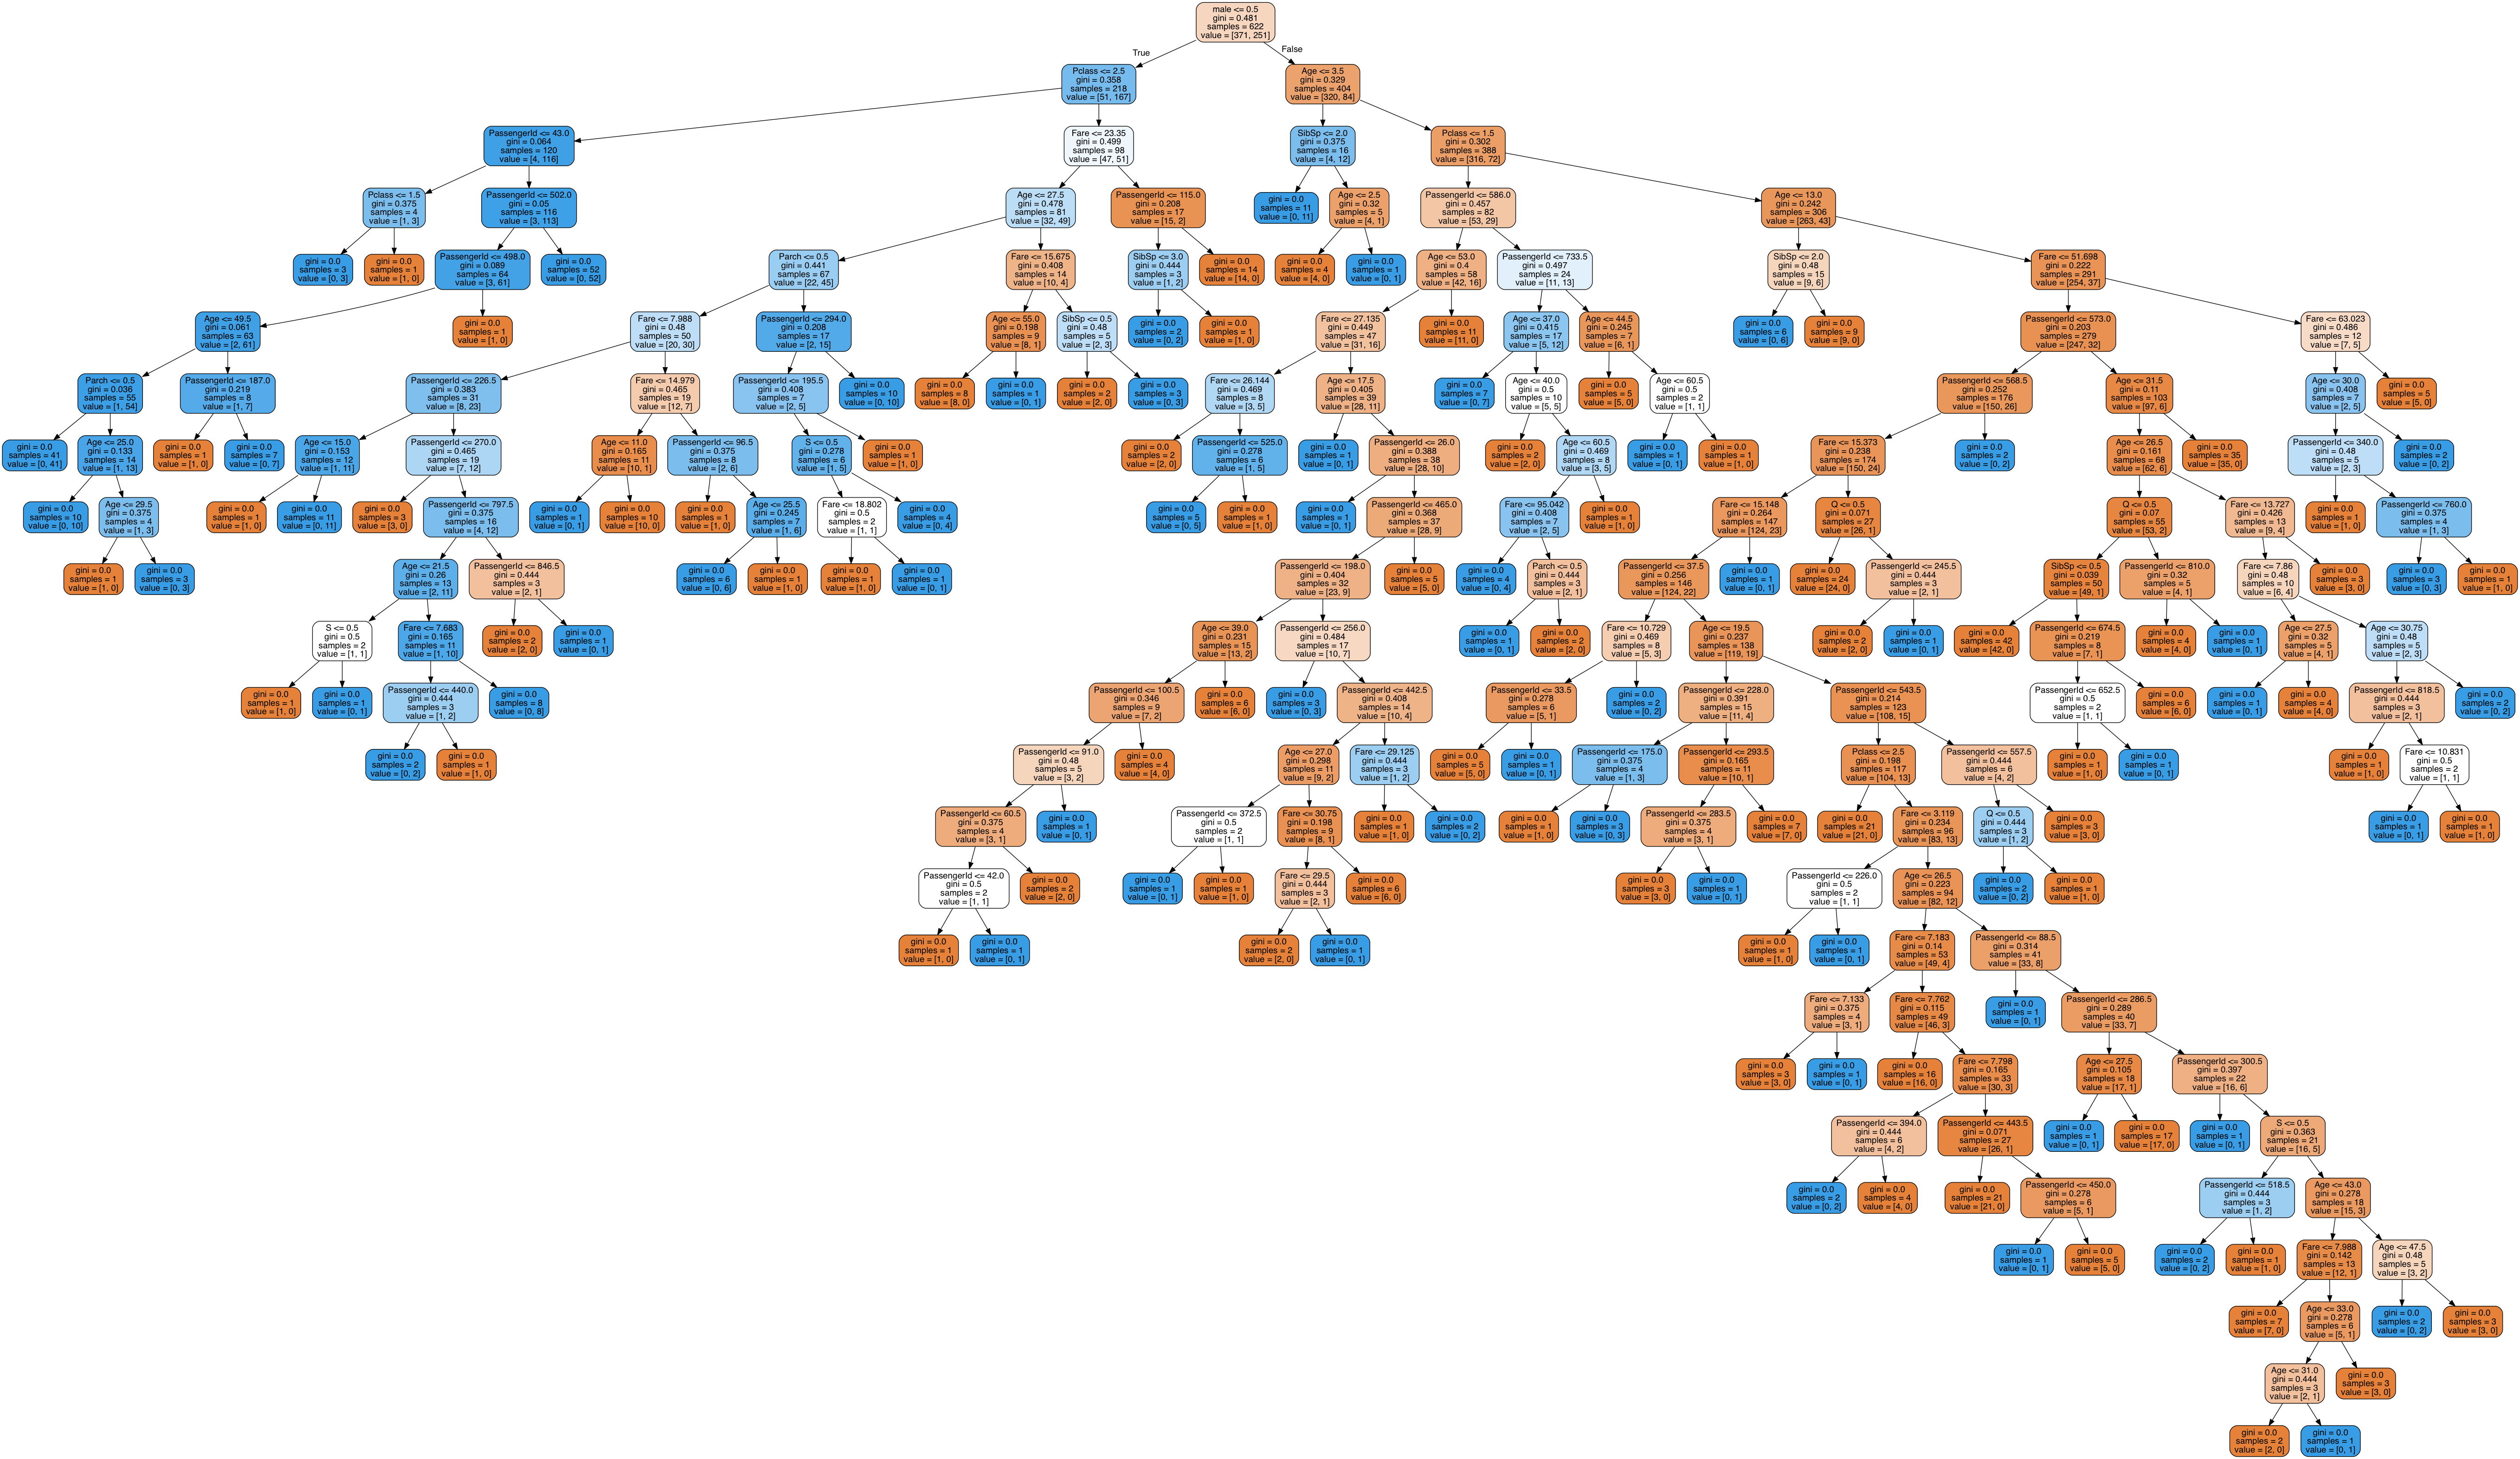

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# RandomForest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[160  18]
 [ 23  66]]


             precision    recall  f1-score   support

          0       0.87      0.90      0.89       178
          1       0.79      0.74      0.76        89

avg / total       0.84      0.85      0.85       267



# Support Vektor Machines

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[174   4]
 [ 88   1]]


             precision    recall  f1-score   support

          0       0.66      0.98      0.79       178
          1       0.20      0.01      0.02        89

avg / total       0.51      0.66      0.53       267



In [24]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[147  31]
 [ 25  64]]


             precision    recall  f1-score   support

          0       0.85      0.83      0.84       178
          1       0.67      0.72      0.70        89

avg / total       0.79      0.79      0.79       267



In [25]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.40      0.55       178
          1       0.43      0.91      0.58        89

avg / total       0.74      0.57      0.56       267



In [ ]:
model = SVC(kernel='poly', degree=3)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))